# UAI521 Bioinformatics part - Task 

# Biological data procession  

### Student Name: Nikhil Thorat
### Program : Masters in Artificial Intelligence and Data Science



|Organism group|organism|
|---|---|
|Mammalia|Pongo_abelii|
|Mammalia|Sarcophilus_harrisii|
|Mammalia|Ornithorthynchus_anatinus|
|Mammalia|Ursus_maritimus|
|Mammalia|Rattus_norvegicus|
|Aves|Apteryx_haastii|
|Aves|Parus_major|
|Aves|Otus_sunia|
|Aves|Anas_platyrhynchos|
|Aves|Numida_meleagris|
|Molusca|Octupus_bimaculoides|
|Molusca|Lottia_gigantea|
|Molusca|Haliotis_rubra|
|Molusca|Crassostrea_gigas|
|Molusca|Mizuhopecten_yessoensis|
|Osteichthyes|Anabas_testudineous|
|Osteichthyes|Cyprinus_carpio_carpio|
|Osteichthyes|Cottoperca_gobio|
|Osteichthyes|Esox_lucius|
|Osteichthyes|Denticeps_clupeoides|
|Crustacea|Penaeus_monodon|
|Crustacea|Daphnia_magna|
|Crustacea|Pollicipes_pollicipes|
|Crustacea|Hyalella_azteca|
|Crustacea|Lepeophtheirus_salmonis|


In [7]:
pip install biopython


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install codon-bias

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import csv
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
from codonbias.scores import EffectiveNumberOfCodons as ENC
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import umap
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


## Data Import and Parsing

In [2]:
def extract_organisms_name(filename):
    organism_name = filename.split('.')[0]

    if organism_name in ['Pongo_abelii', 'Sarcophilus_harrisii', 'Ornithorhynchus_anatinus', 'Ursus_maritimus', 'Rattus_norvegicus']:
        category = 'Mammalia'
    elif organism_name in ['Apteryx_haastii', 'Parus_major', 'Otus_sunia', 'Anas_platyrhynchos', 'Numida_meleagris']:
        category = 'Aves'
    elif organism_name in ['Anabas_testudineus', 'Cyprinus_carpio_carpio', 'Cottoperca_gobio', 'Esox_lucius', 'Denticeps_clupeoides']:
        category = 'Osteichthyes'
    elif organism_name in ['Octopus_bimaculoides', 'Lottia_gigantea', 'Haliotis_rubra', 'Crassostrea_gigas', 'Mizuhopecten_yessoensis']:
        category = 'Molusca'
    elif organism_name in ['Penaeus_monodon', 'Daphnia_magna', 'Pollicipes_pollicipes', 'Hyalella_azteca', 'Lepeophtheirus_salmonis']:
        category = 'Crustacea'
    else:
        category = 'Unknown_category'

    return category, organism_name


In [3]:
#function to get ENC values     
def calculate_enc(cds_seq):
    return ENC().get_score(str(cds_seq))

### Below Code fetches all .fa files from local storage and parses them ,creating one single csv file to save in local drive as well as dataframe for use in our code.
We can either import the csv file, or we can directly use the list and convert it to dataframe for our data exploration.

In [ ]:
fasta_folder = "/Users/nikhilthorat/Downloads/backup"
csv_output_file = "/Users/nikhilthorat/Downloads/Bioinformatic_task/All_Organisms1.csv"

all_data = []

for filename in os.listdir(fasta_folder):
    if filename.endswith(".fa"):
        fasta_file_path = os.path.join(fasta_folder, filename)
        records = SeqIO.parse(fasta_file_path, "fasta")

        organism_name = extract_organisms_name(filename)[0]
        species = extract_organisms_name(filename)[1]
        for record in records:
            sequence_id = record.id
            sequence_data = str(record.seq)

            
            if sequence_data.startswith("ATG"):
                cds_length = len(sequence_data)
                gc_percentage = gc_fraction(sequence_data) * 100
                gc1 = gc_fraction(sequence_data[::3]) * 100  
                gc2 = gc_fraction(sequence_data[1::3]) * 100 
                gc3 = gc_fraction(sequence_data[2::3]) * 100

                enc_value = calculate_enc(sequence_data)

                all_data.append([organism_name,species, sequence_id, cds_length, f"{gc_percentage:.2f}", f"{enc_value:.2f}", f"{gc1:.2f}", f"{gc2:.2f}", f"{gc3:.2f}"])
                
with open(csv_output_file, "w", newline="") as csvfile:
    csv_writer = csv.writer(csvfile, delimiter="\t")

    csv_writer.writerow(["Organism","Species", "cds ID", "cds length", "GC%", "ENc", "GC1", "GC2", "GC3"])

    csv_writer.writerows(all_data)

print(f"CSV file '{csv_output_file}' has been created.")


In [6]:
#We can import the saved CSV file like below too
#df = pd.read_csv("/Users/nikhilthorat/Downloads/Bioinformatic_task/All_Organisms1.csv",sep='\t')
df

Organism          Species          cds ID  cds length    GC%    ENc  \
0       Crustacea  Hyalella_azteca  XM_018157745.1        3366  53.18  55.82   
1       Crustacea  Hyalella_azteca  XM_018164080.1         477  42.98  49.11   
2       Crustacea  Hyalella_azteca  XM_018159337.1        2376  52.31  55.80   
3       Crustacea  Hyalella_azteca  XM_018165992.1         456  46.49  55.20   
4       Crustacea  Hyalella_azteca  XM_018165991.1         456  46.49  55.20   
...           ...              ...             ...         ...    ...    ...   
905983  Crustacea    Daphnia_magna  XM_045170991.1        2523  47.17  57.22   
905984  Crustacea    Daphnia_magna  XM_032924216.2        3093  47.72  57.15   
905985  Crustacea    Daphnia_magna  XM_045170990.1        3066  47.65  57.28   
905986  Crustacea    Daphnia_magna  XM_032932507.2         405  53.83  49.58   
905987  Crustacea    Daphnia_magna  XM_032932046.2         495  39.80  50.28   

          GC1    GC2    GC3  
0       56.15  53.03  50.36  
1       50.94  39.62  38.36  
2       54.29  46.34  56.31  
3       50.66  42.76  46.05  
4       50.66  42.76  46.05  
...       ...    ...    ...  
905983  54.22  41.62  45.66  
905984  54.51  43.26  45.39  
905985  54.21  43.05  45.69  
905986  62.22  55.56  43.70  
905987  49.09  38.18  32.12  

[905988 rows x 9 columns]

In [7]:
df['Species'].unique()

array(['Hyalella_azteca', 'Crassostrea_gigas', 'Lepeophtheirus_salmonis',
       'Lottia_gigantea', 'Octopus_bimaculoides', 'Rattus_norvegicus',
       'Cottoperca_gobio', 'Pollicipes_pollicipes', 'Otus_sunia',
       'Parus_major', 'Mizuhopecten_yessoensis', 'Haliotis_rubra',
       'Ursus_maritimus', 'Anas_platyrhynchos', 'Cyprinus_carpio_carpio',
       'Sarcophilus_harrisii', 'Apteryx_haastii', 'Esox_lucius',
       'Pongo_abelii', 'Numida_meleagris', 'Penaeus_monodon',
       'Ornithorhynchus_anatinus', 'Denticeps_clupeoides',
       'Anabas_testudineus', 'Daphnia_magna'], dtype=object)

In [9]:
#Shuffling our DataFrame
df = df.sample(frac=1, random_state=42)

# VISUALIZATIONS 

### Category 1 : 'GC%', and  'GC3'

In [50]:
pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:

#While parsing there might be a chance that few columns can be read as string
# Columns to convert to numeric
columns_to_convert = ["cds length", "GC%", "ENc", "GC1", "GC2", "GC3"]

for column in columns_to_convert:
    try:
        df[column] = pd.to_numeric(df[column])
        print(f"All values in the column '{column}' are numeric.")
    except pd.errors.NumberError:
        print(f"At least one value in the column '{column}' is not numeric.")


All values in the column 'cds length' are numeric.
All values in the column 'GC%' are numeric.
All values in the column 'ENc' are numeric.
All values in the column 'GC1' are numeric.
All values in the column 'GC2' are numeric.
All values in the column 'GC3' are numeric.


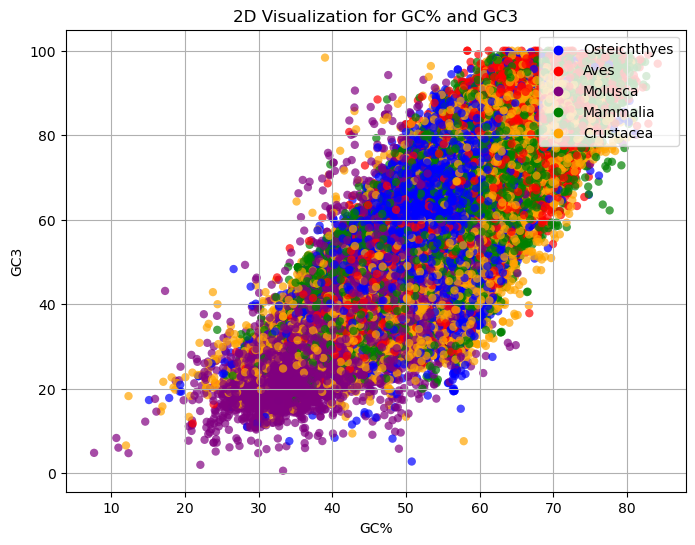

In [23]:

features_to_visualize = ['GC%', 'GC3']

# custom color map for each organism
organism_colors = {'Aves': 'red', 'Mammalia': 'green', 'Osteichthyes': 'blue', 'Molusca': 'purple', 'Crustacea': 'orange'}

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=features_to_visualize[0], y=features_to_visualize[1], hue='Organism', palette=organism_colors, alpha=0.7,edgecolor='none')
plt.title(f'2D Visualization for {features_to_visualize[0]} and {features_to_visualize[1]}')
plt.xlabel(features_to_visualize[0])
plt.ylabel(features_to_visualize[1])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


#### For clean representation I have kept only 50 examples per Organism 

In [12]:
rows_per_organism = 50

df_filtered = df.groupby('Organism').head(rows_per_organism)


In [13]:
df_filtered = df_filtered.reset_index(drop=True)
df_filtered

Organism                 Species                cds ID  cds length  \
0    Osteichthyes             Esox_lucius  ENSELUT00000068281.1        3987   
1            Aves        Numida_meleagris  ENSNMET00000028295.1         861   
2         Molusca       Crassostrea_gigas              G6806.13        1119   
3    Osteichthyes  Cyprinus_carpio_carpio  ENSCCRT00000143446.1         774   
4    Osteichthyes             Esox_lucius  ENSELUT00000051427.1        1311   
..            ...                     ...                   ...         ...   
245          Aves      Anas_platyrhynchos  ENSAPLT00020008400.1        1635   
246          Aves        Numida_meleagris  ENSNMET00000009726.1        1209   
247          Aves             Parus_major  ENSPMJT00000019737.1        1893   
248          Aves             Parus_major  ENSPMJT00000013940.1         888   
249          Aves        Numida_meleagris  ENSNMET00000038296.1        3270   

       GC%    ENc    GC1    GC2    GC3  
0    57.31  49.32  57.94  47.78  66.22  
1    68.99  36.51  58.19  55.75  93.03  
2    44.24  51.65  43.97  32.44  56.30  
3    53.75  50.32  45.35  54.26  61.63  
4    53.55  50.17  58.58  43.94  58.12  
..     ...    ...    ...    ...    ...  
245  69.85  40.96  69.17  57.06  83.30  
246  46.73  54.44  48.39  41.44  50.37  
247  53.46  51.93  49.76  51.03  59.59  
248  60.81  45.77  60.47  43.92  78.04  
249  44.04  53.88  51.19  39.45  41.47  

[250 rows x 9 columns]

In [121]:
features_to_visualize

['GC%', 'GC3']

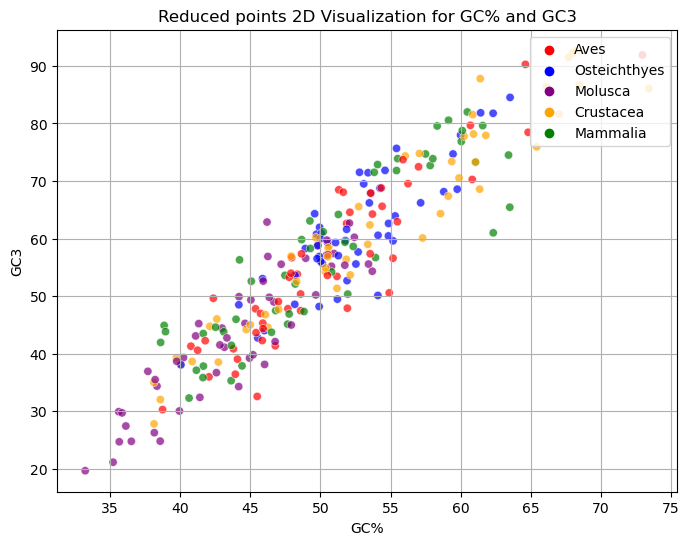

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x=features_to_visualize[0], y=features_to_visualize[1], hue='Organism', palette=organism_colors, alpha=0.7)
plt.title(f'Reduced points 2D Visualization for {features_to_visualize[0]} and {features_to_visualize[1]}')
plt.xlabel(features_to_visualize[0])
plt.ylabel(features_to_visualize[1])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Category 2: (GC1 + GC2)/2 and GC3

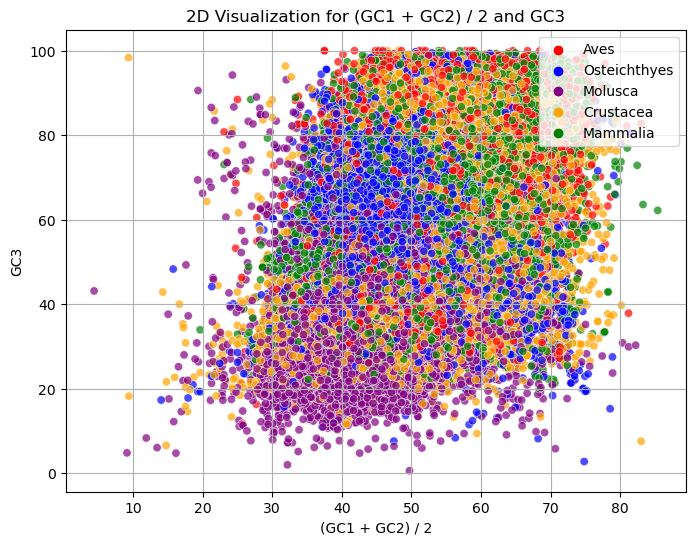

In [123]:
df['Average_GC1_GC2'] = (df['GC1'] + df['GC2']) / 2

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Average_GC1_GC2', y='GC3', hue='Organism', palette=organism_colors, alpha=0.7)
plt.title('2D Visualization for (GC1 + GC2) / 2 and GC3')
plt.xlabel('(GC1 + GC2) / 2')
plt.ylabel('GC3')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


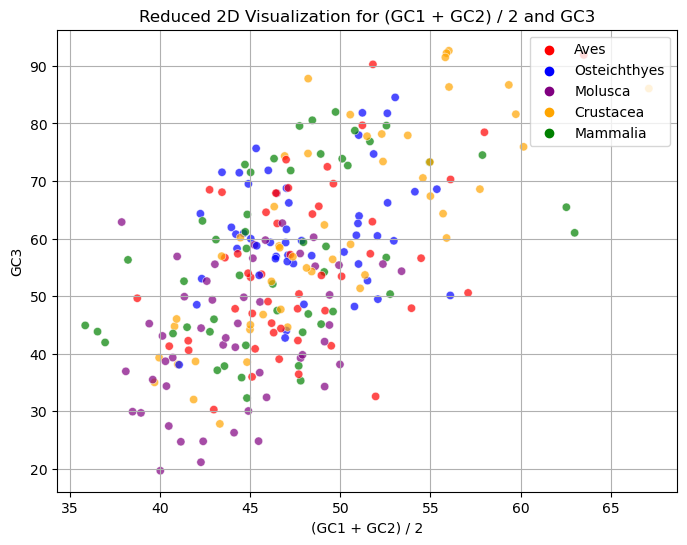

In [124]:
df_filtered['Average_GC1_GC2'] = (df_filtered['GC1'] + df_filtered['GC2']) / 2

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='Average_GC1_GC2', y='GC3', hue='Organism', palette=organism_colors, alpha=0.7)
plt.title('Reduced 2D Visualization for (GC1 + GC2) / 2 and GC3')
plt.xlabel('(GC1 + GC2) / 2')
plt.ylabel('GC3')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### 3-D graph for GC1,GC2,GC3

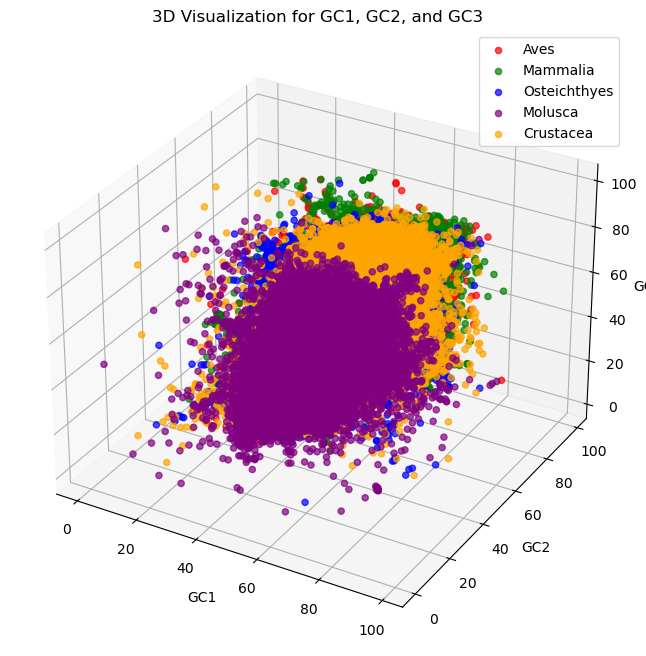

In [125]:
features_to_visualize = ['GC1', 'GC2', 'GC3']


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for organism, color in organism_colors.items():
    subset = df[df['Organism'] == organism]
    ax.scatter(subset[features_to_visualize[0]], subset[features_to_visualize[1]], subset[features_to_visualize[2]], c=color, label=organism, alpha=0.7)

ax.set_xlabel(features_to_visualize[0])
ax.set_ylabel(features_to_visualize[1])
ax.set_zlabel(features_to_visualize[2])

ax.set_title(f'3D Visualization for {features_to_visualize[0]}, {features_to_visualize[1]}, and {features_to_visualize[2]}')
ax.legend()
ax.grid(True)
plt.show()


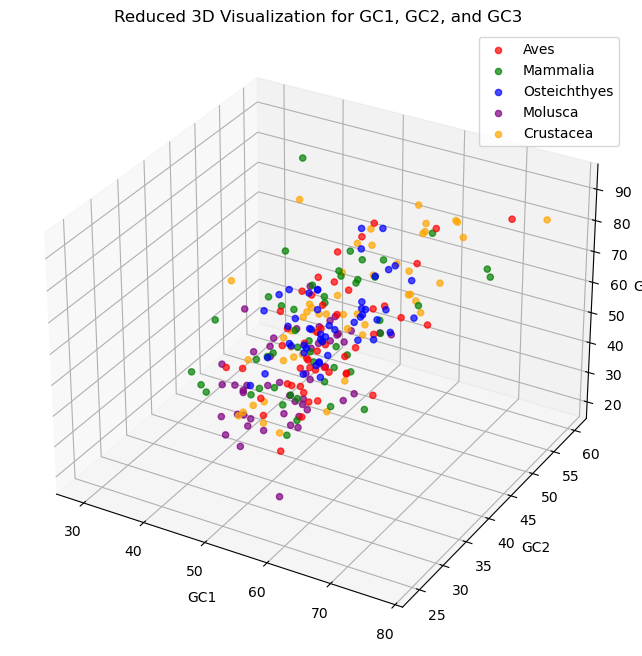

In [67]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
features_to_visualize = ['GC1', 'GC2', 'GC3']
for organism, color in organism_colors.items():
    subset = df_filtered[df_filtered['Organism'] == organism]
    ax.scatter(subset[features_to_visualize[0]], subset[features_to_visualize[1]], subset[features_to_visualize[2]], c=color, label=organism, alpha=0.7)

ax.set_xlabel(features_to_visualize[0])
ax.set_ylabel(features_to_visualize[1])
ax.set_zlabel(features_to_visualize[2])

ax.set_title(f'Reduced 3D Visualization for {features_to_visualize[0]}, {features_to_visualize[1]}, and {features_to_visualize[2]}')
ax.legend()
plt.grid(True)
plt.show()

### Category 3: GC3 and ENc

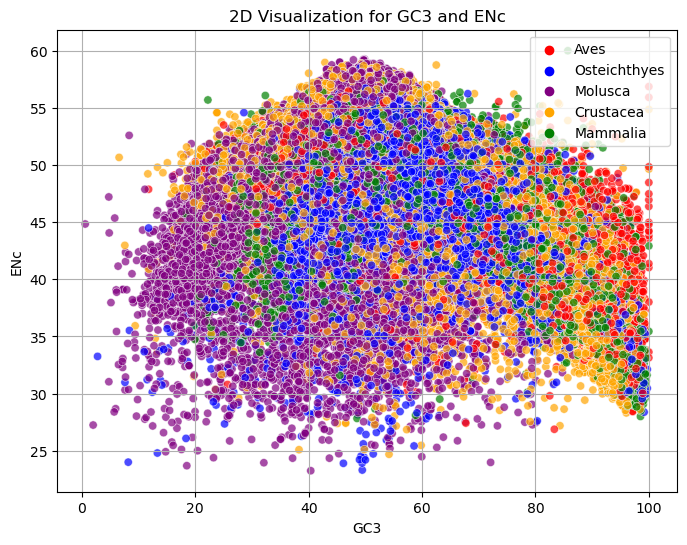

In [126]:
features_to_visualize = ['GC3', 'ENc']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=features_to_visualize[0], y=features_to_visualize[1], hue='Organism', palette=organism_colors, alpha=0.7)
plt.title(f'2D Visualization for {features_to_visualize[0]} and {features_to_visualize[1]}')
plt.xlabel(features_to_visualize[0])
plt.ylabel(features_to_visualize[1])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

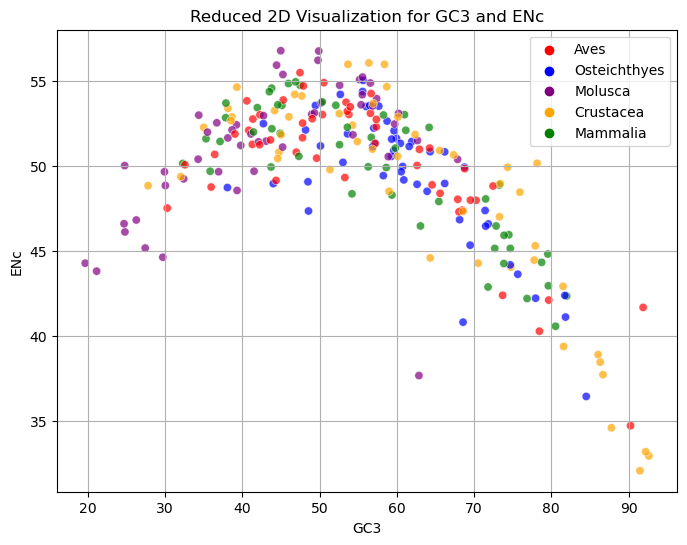

In [127]:
features_to_visualize = ['GC3', 'ENc']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x=features_to_visualize[0], y=features_to_visualize[1], hue='Organism', palette=organism_colors, alpha=0.7)
plt.title(f'Reduced 2D Visualization for {features_to_visualize[0]} and {features_to_visualize[1]}')
plt.xlabel(features_to_visualize[0])
plt.ylabel(features_to_visualize[1])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Category 4: GC% and ENc

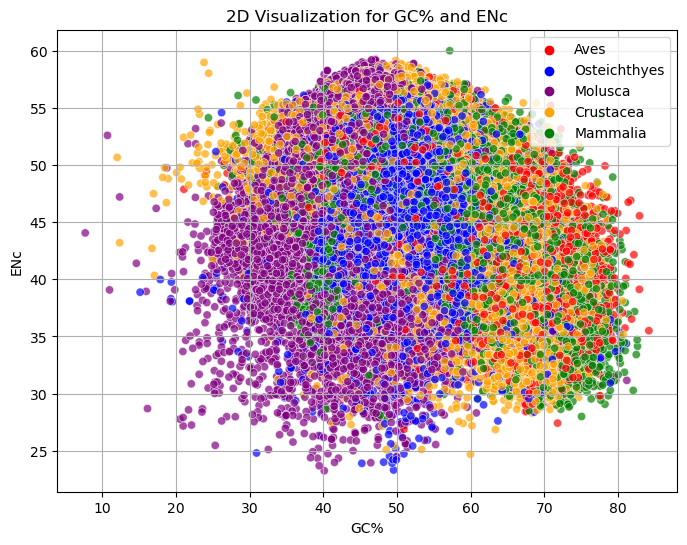

In [129]:
features_to_visualize = ['GC%', 'ENc']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=features_to_visualize[0], y=features_to_visualize[1], hue='Organism', palette=organism_colors, alpha=0.7)
plt.title(f'2D Visualization for {features_to_visualize[0]} and {features_to_visualize[1]}')
plt.xlabel(features_to_visualize[0])
plt.ylabel(features_to_visualize[1])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

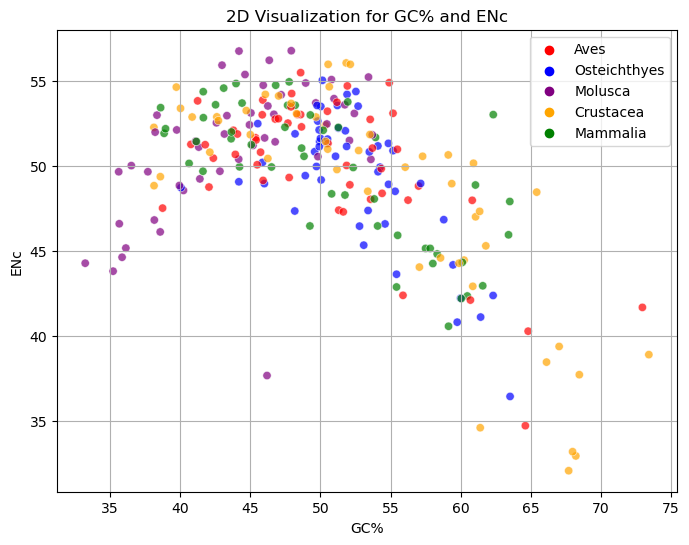

In [130]:
features_to_visualize = ['GC%', 'ENc']

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x=features_to_visualize[0], y=features_to_visualize[1], hue='Organism', palette=organism_colors, alpha=0.7)
plt.title(f'2D Visualization for {features_to_visualize[0]} and {features_to_visualize[1]}')
plt.xlabel(features_to_visualize[0])
plt.ylabel(features_to_visualize[1])
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## ** UMAP VISUALIZATION **

### The dataset has been filtered to include a balanced representation, with 50 samples from each organism category. This strategic sampling approach aims to reduce computational stress while preserving the diversity of the original data.

In [14]:
import umap
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler

# Assuming df_filtered is your DataFrame

features_for_umap = ['GC1', 'GC2', 'GC3', 'cds length', 'ENc', 'GC%']
data_for_umap = df_filtered[features_for_umap]

# Standardize the data
scaler = StandardScaler()
data_for_umap_scaled = scaler.fit_transform(data_for_umap)

# Apply UMAP
umap_model = umap.UMAP(n_components=3)
umap_result = umap_model.fit_transform(data_for_umap_scaled)

# Create a DataFrame for UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# Check if 'Organism' column exists before adding it to the DataFrame
if 'Organism' in df_filtered.columns:
    umap_df['Organism'] = df_filtered['Organism']

# Create 3D UMAP visualization using Plotly Express
fig = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='Organism', opacity=0.7, title='3D UMAP Visualization')
fig.show()


## PCA analysis

#### Kindly note that below PCA part and code is kind of copied/referenced from my semester project (PCA related) for Feature Enginnering which I am going to submit to prof. Ivo Bukovský 

Number of components explaining 95% variance: 2


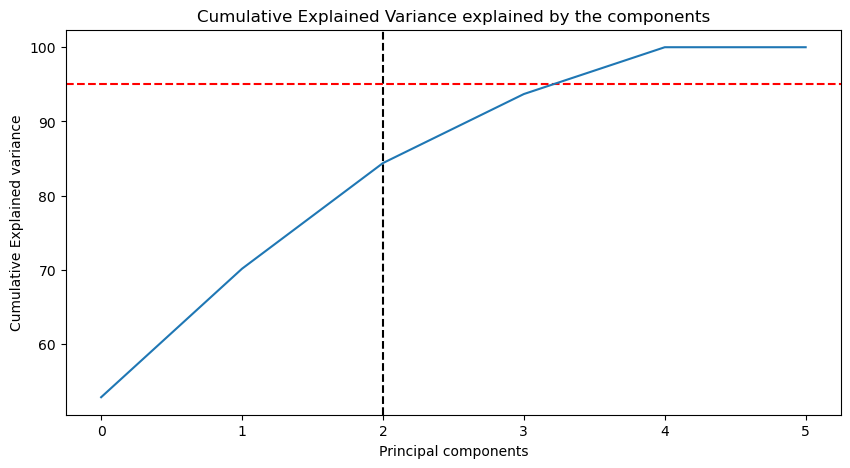

In [15]:
numerical_columns = ['cds length', 'GC%', 'ENc', 'GC1', 'GC2', 'GC3']


numerical_data = df[numerical_columns]

# Standardizing
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

pca = PCA()
pca.fit(numerical_data_scaled)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>80)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

/var/folders/s3/fnj4bl6x0n352j7g9mn1pxyr0000gn/T/ipykernel_43707/1563717803.py:14: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




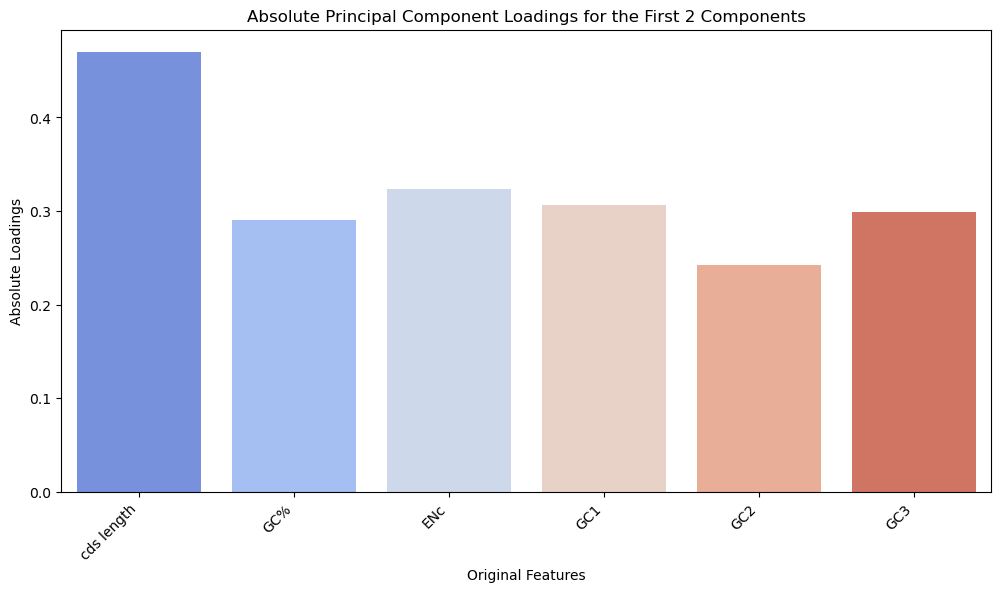

In [16]:
# here we are fitting PCA with k number of components found above
pca = PCA(n_components=k)
pca.fit(numerical_data_scaled)


loadings = pca.components_

# Creating a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=numerical_columns)


plt.figure(figsize=(12, 6))
plt.title('Absolute Principal Component Loadings for the First {} Components'.format(k))
sns.barplot(data=loadings_df.abs(), ci=None, palette='coolwarm')
plt.xlabel('Original Features')
plt.ylabel('Absolute Loadings')
plt.xticks(rotation=45, ha='right')
plt.show()



# Anaysing the PCA graph

In the context of Principal Component Analysis (PCA), loadings represent the coefficients indicating the contribution of each original feature to the principal components
The absolute value of loadings is used to measure the magnitude of the contribution of each original feature to a principal component.

##### If you observe that the bar lengths for four components are relatively high compared to the other two, it suggests that these four components are more important in capturing the variance within our data. The absolute values of the loadings represent the strength and direction of the relationship between the original features and the principal components.
#### few interpretations based on the bar lengths
1. High Bar Lengths (Absolute Loadings): Features with high absolute loadings for a specific principal component contribute significantly to that component. The sign of the loading indicates the direction of the contribution (positive or negative).
2. Low Bar Lengths (Absolute Loadings): Features with low absolute loadings for a specific principal component contribute less to that component. Their impact on the variance explained by that particular component is relatively weaker.
3. If you notice that certain features have consistently high absolute loadings across multiple components, those features are crucial in explaining the overall variance in our data.

#### In this graph [cds length],[ENc],[GC%] and [GC1] explain 95% of the variance ratio.

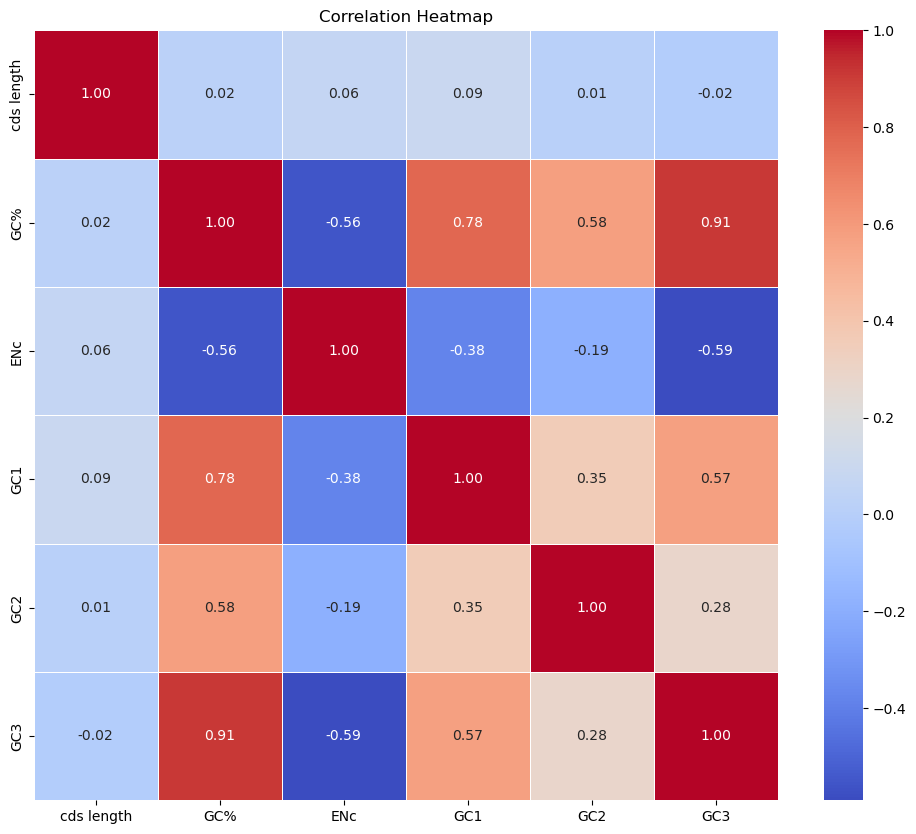

In [17]:
reduced = ['cds length', 'GC%', 'ENc', 'GC1', 'GC2', 'GC3']


numerical_data = df[reduced]
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Explaination of Correlation Heatmap
The correlation heatmap visually represents the relationships between different components in the dataset. Darker and redder areas on the heatmap indicate higher correlation between the corresponding components.

Upon closer inspection of the heatmap:

There is a strong positive correlation of 0.91 between GC3 and GC%.
GC2 and GC% also exhibit a notable positive correlation, with a coefficient of 0.58.
Similarly, GC1 and GC% demonstrate a substantial positive correlation, measured at 0.77.
GC1 and GC3 display a moderately positive correlation, with a coefficient of 0.57.
The correlation between GC2 and GC1 is present but relatively weaker, measured at 0.35.
In summary, GC1, GC2, and GC3 are positively correlated with GC%, suggesting that changes in one of these components are associated with corresponding changes in GC%.

#### Low correlation between CDS Length and GC1,GC2,GC3
Correlation implies that as one component increases, the other tends to increase too.

#### There is also high negative correlation between ENc and GC1,GC2,GC3,GC%


### Considerations:

#### Benefit of Positive Correlation: 
Variables with a high positive correlation might be considered redundant for certain analyses. Including both variables may not provide much additional information, and you could choose the one most relevant to your analysis.
#### Benefit of Negative Correlation: 
Variables with a high negative correlation might offer insights into trade-offs or dependencies. Analyzing them together could provide a more comprehensive understanding of the system.

In [18]:
pca = PCA(n_components = k).fit(numerical_data_scaled)
X_pca = pca.transform(numerical_data_scaled)

In [19]:
X_pca

array([[-1.5484824 ,  1.35065547],
       [-4.81759301, -1.02268239],
       [ 1.69860197, -0.78708023],
       ...,
       [ 0.72291209, -0.78152019],
       [ 0.47642441, -0.27896633],
       [ 1.7668487 , -0.74066768]])

## K Nearest Neighbours

In [20]:
target_column = 'Organism'
X_final = pd.concat([pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)]), df[target_column]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_final.drop(target_column, axis=1), X_final[target_column], test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)


Accuracy: 0.24

Confusion Matrix:
 [[ 2789  2497  4164  4336  7896]
 [ 3141  2818  4628  4684  8526]
 [ 4397  3859  6508  6719 12205]
 [ 4857  4352  7016  7580 13721]
 [ 8362  7455 12240 12900 23548]]

Classification Report:
               precision    recall  f1-score   support

        Aves       0.12      0.13      0.12     21682
   Crustacea       0.13      0.12      0.13     23797
    Mammalia       0.19      0.19      0.19     33688
     Molusca       0.21      0.20      0.21     37526
Osteichthyes       0.36      0.37      0.36     64505

    accuracy                           0.24    181198
   macro avg       0.20      0.20      0.20    181198
weighted avg       0.24      0.24      0.24    181198



## K Means For our data

/Users/nikhilthorat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



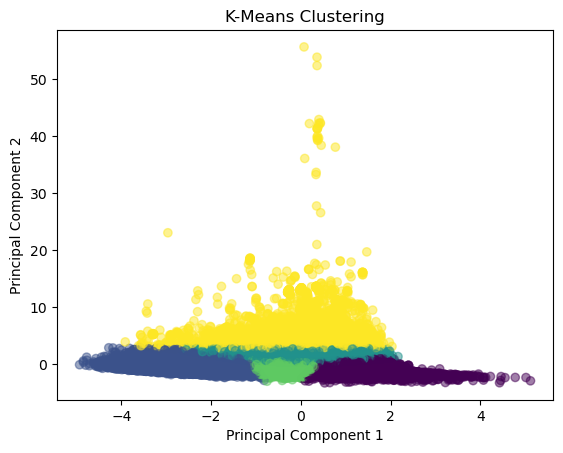

In [21]:
X = X_final.drop(target_column, axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### That looks messy, let's try it on a smaller subset of data

/Users/nikhilthorat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



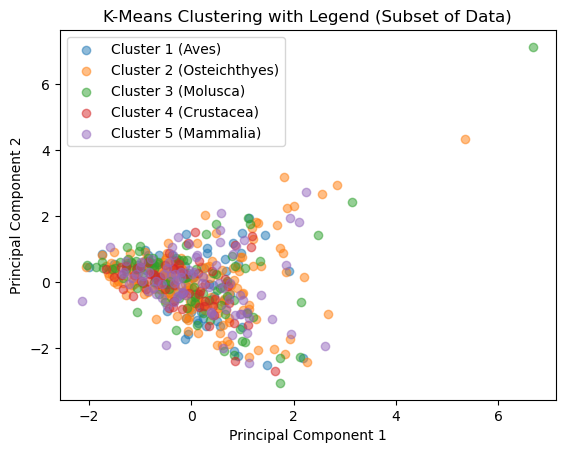

In [25]:
X = X_final.drop(target_column, axis=1)
y = X_final[target_column]

# Shuffle and select a subset of our data
subset_size = 500
X_subset = shuffle(X, random_state=42).head(subset_size)
y_subset = shuffle(y, random_state=42).head(subset_size)


scaler = StandardScaler()
X_scaled_subset = scaler.fit_transform(X_subset)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled_subset)

cluster_labels_subset = kmeans.labels_

pca = PCA(n_components=2)
X_pca_subset = pca.fit_transform(X_scaled_subset)

unique_organisms = y_subset.unique()

for i, organism in enumerate(unique_organisms):
    cluster_indices = [index for index, label in enumerate(y_subset) if label == organism]
    plt.scatter(
        X_pca_subset[cluster_indices, 0],
        X_pca_subset[cluster_indices, 1],
        label=f'Cluster {i + 1} ({organism})',
        alpha=0.5
    )

plt.legend()
plt.title('K-Means Clustering with Legend (Subset of Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Using K means on our below combination

1. GC and GC3
2. (GC1+GC2)/2 and GC3 
3. GC3 and ENC
4. GC and ENC

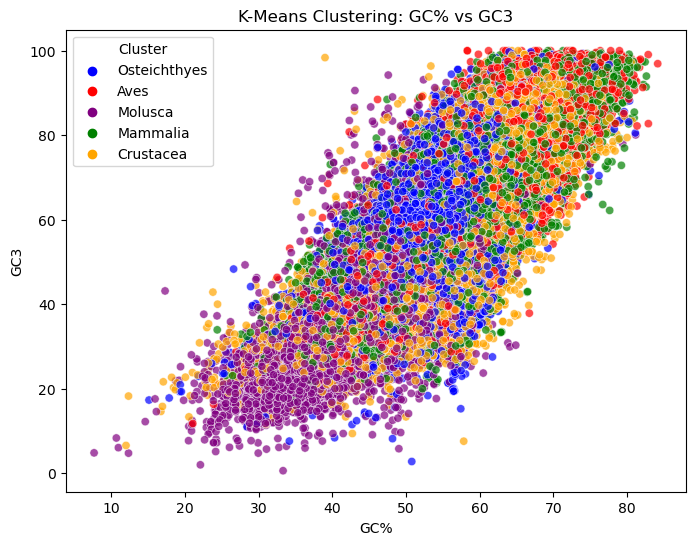

Adjusted_rand_score is  0.09896107510692774
normalized_mutual_info_score is  0.10802382293209781


/Users/nikhilthorat/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



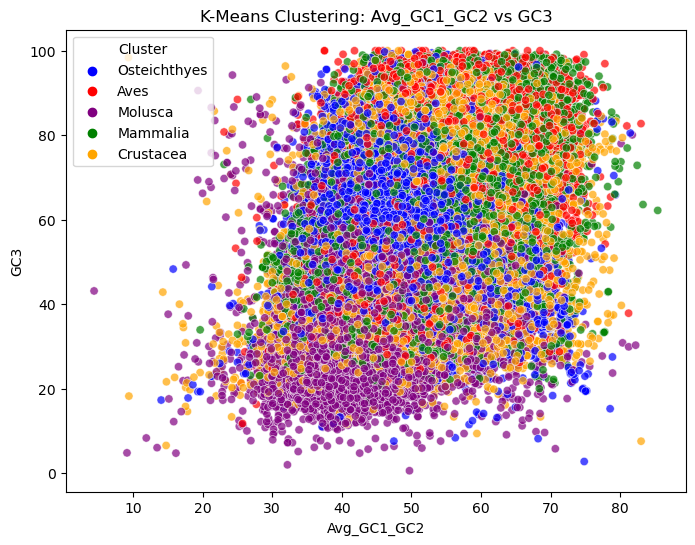

Adjusted_rand_score is  0.08647659786780396
normalized_mutual_info_score is  0.09467660143832288


/Users/nikhilthorat/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



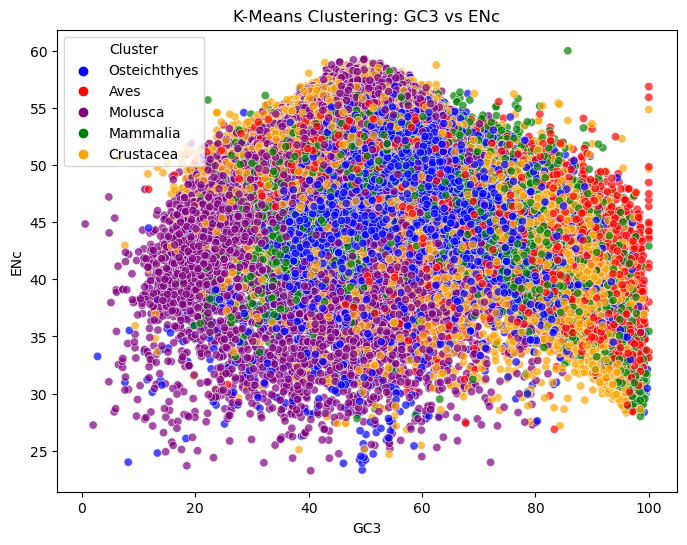

Adjusted_rand_score is  0.085359353454983
normalized_mutual_info_score is  0.09260766537126613


/Users/nikhilthorat/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



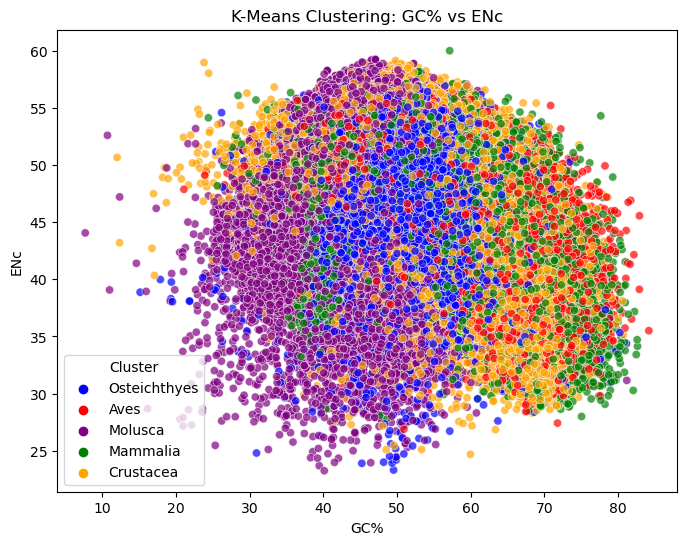

Adjusted_rand_score is  0.08357668166519835
normalized_mutual_info_score is  0.09125699854107351


In [24]:
# Extract numerical columns for clustering
numerical_columns = ["GC%", "ENc", "GC1", "GC2", "GC3"]

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[numerical_columns])

df['Avg_GC1_GC2'] = df[['GC1', 'GC2']].mean(axis=1)

# Function to apply K-Means clustering and create scatterplot
def apply_kmeans_and_plot(X, x_label, y_label):
    kmeans = KMeans(n_clusters=5, random_state=42,n_init=3)
    df['Cluster'] = kmeans.fit_predict(X)

    # Create scatterplot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_label, y=y_label, hue='Organism', palette=organism_colors, alpha=0.7)
    plt.title(f'K-Means Clustering: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(title='Cluster')
    plt.show()
    
    ars =adjusted_rand_score(df['Organism'], kmeans.labels_)
    nmis = normalized_mutual_info_score(df['Organism'], kmeans.labels_)
    print("Adjusted_rand_score is ",ars)
    print("normalized_mutual_info_score is ",nmis)


# Apply K-Means and create scatterplots for each combination
apply_kmeans_and_plot(df_standardized[:, [0, 4]], 'GC%', 'GC3')
apply_kmeans_and_plot(df_standardized[:, [2, 4]], 'Avg_GC1_GC2', 'GC3')
apply_kmeans_and_plot(df_standardized[:, [4, 1]], 'GC3', 'ENc')
apply_kmeans_and_plot(df_standardized[:, [0, 1]], 'GC%', 'ENc')


### Using averages of our numerical columns grouped by species first and then by Organisms
#### In the below section I have taken an average of all numerical values of our data based on each species, combined them into a dataframe and used it as input for our K-Means algorithm

In [26]:
df = df.drop('cds ID', axis=1)
# Group by 'Organism' and 'Species' and calculate the mean for each group
averages_df = df.groupby(['Organism', 'Species']).mean().reset_index()
averages_df



Organism                   Species   cds length        GC%        ENc  \
0           Aves        Anas_platyrhynchos  1901.663885  52.081509  48.807976   
1           Aves           Apteryx_haastii  1933.439632  49.880255  49.746698   
2           Aves          Numida_meleagris  2120.118417  51.314781  49.566091   
3           Aves                Otus_sunia  2042.057382  50.675397  49.539309   
4           Aves               Parus_major  2106.156783  52.029385  48.727637   
5      Crustacea             Daphnia_magna  1807.135496  46.273089  52.905299   
6      Crustacea           Hyalella_azteca  1715.459034  53.033492  50.700372   
7      Crustacea   Lepeophtheirus_salmonis  1342.840330  39.599938  50.420511   
8      Crustacea           Penaeus_monodon  1575.649599  52.635467  50.034238   
9      Crustacea     Pollicipes_pollicipes  1334.845898  63.846813  40.591499   
10      Mammalia  Ornithorhynchus_anatinus  2051.075817  55.913435  47.458979   
11      Mammalia              Pongo_abelii  1653.694786  52.037427  48.895163   
12      Mammalia         Rattus_norvegicus  1738.047517  51.547690  50.247175   
13      Mammalia      Sarcophilus_harrisii  1977.328569  48.983178  49.884855   
14      Mammalia           Ursus_maritimus  1757.478477  51.891361  49.109965   
15       Molusca         Crassostrea_gigas  1328.600535  44.738218  52.631536   
16       Molusca            Haliotis_rubra  1531.351824  48.733364  52.113321   
17       Molusca           Lottia_gigantea  1252.700723  37.330236  47.175189   
18       Molusca   Mizuhopecten_yessoensis  1988.786304  46.068742  53.326091   
19       Molusca      Octopus_bimaculoides  1742.848653  40.303851  50.731751   
20  Osteichthyes        Anabas_testudineus  2045.278731  51.075186  50.288267   
21  Osteichthyes          Cottoperca_gobio  1929.214725  52.834436  49.270779   
22  Osteichthyes    Cyprinus_carpio_carpio  2115.013514  50.239433  51.038087   
23  Osteichthyes      Denticeps_clupeoides  1985.115241  54.276291  48.440784   
24  Osteichthyes               Esox_lucius  2118.354689  53.244438  48.979246   

          GC1        GC2        GC3  Avg_GC1_GC2   Cluster  
0   55.211620  42.370367  58.662452    48.790994  1.576938  
1   53.983137  41.295619  54.367406    47.639378  1.493806  
2   54.889699  42.193762  56.860901    48.541731  1.477053  
3   54.327573  41.494538  56.204349    47.911055  1.478991  
4   55.228313  42.256600  58.603263    48.742457  1.693664  
5   51.885663  41.331782  45.601993    46.608722  0.685386  
6   55.729615  43.688254  59.682879    49.708935  1.365364  
7   46.218771  37.837091  34.738124    42.027931  1.689396  
8   55.425614  44.163850  58.317687    49.794732  1.564829  
9   62.900494  45.582295  83.058199    54.241395  3.124852  
10  57.417612  43.824005  66.498692    50.620808  1.934121  
11  55.624481  42.533776  57.954059    49.079128  1.823502  
12  54.665343  41.989470  57.988292    48.327406  1.548751  
13  53.594634  41.219640  52.135195    47.407137  1.487112  
14  54.906615  41.820666  58.946783    48.363640  1.824032  
15  48.744238  38.964988  46.505390    43.854613  0.702836  
16  51.788690  41.406362  53.005062    46.597526  0.603737  
17  45.249666  37.155015  29.585906    41.202341  1.867326  
18  50.579959  40.053168  47.573073    45.316563  0.373869  
19  46.995871  37.821454  36.093877    42.408663  1.465260  
20  53.837782  40.679640  58.708052    47.258711  1.254394  
21  54.294998  40.856429  63.351938    47.575714  1.751370  
22  53.580127  40.757604  56.380555    47.168865  1.023578  
23  55.559805  41.554027  65.715101    48.556916  1.949741  
24  54.628739  41.380199  63.724433    48.004469  1.938226

/Users/nikhilthorat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/s3/fnj4bl6x0n352j7g9mn1pxyr0000gn/T/ipykernel_43707/4055126031.py:29: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



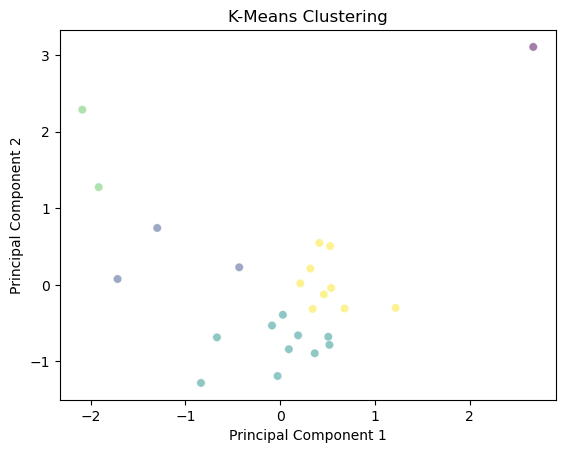

In [27]:

numerical_columns = ['cds length', 'GC%', 'ENc', 'GC1', 'GC2', 'GC3']


numerical_data = averages_df[numerical_columns]

# Standardizing
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
target_column = 'Organism'
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(numerical_data_scaled)
X_pca = pca.transform(numerical_data_scaled)
X_final = pd.concat([pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(k)]), averages_df[target_column]], axis=1)


X = X_final.drop(target_column, axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5, palette=organism_colors)

plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

The utilization of averages for CDS length, ENc, GC%, GC1, GC2, and GC3 serves as an effective strategy to distill meaningful insights from our extensive dataset. 

By condensing these key features into averaged values, we mitigate the challenge of visual clutter on our scatterplot, providing a clearer representation of the species' characteristic value ranges. 

This approach enhances our ability to discern patterns and facilitates more accurate categorization and clustering based on these essential genomic attributes.

### Suitability of K-Means for our data

Pros :

1. Simplicity and Speed:
* K-means is computationally efficient and relatively simple to implement. It works well on large datasets and we have a very large dataset.
* It converges quickly, making it suitable for exploratory data analysis.
2. Scalability:
* K-means is scalable to a large number of dimensions, making it applicable to high-dimensional biological data. However our data had 6 dimentions but K means can be of real use if we have more number of columns too.
3. Cluster Interpretability:
* The clusters produced by k-means are non-overlapping and well-defined, making them easy to interpret.
 

### Few drawbacks of K means just to consider

While K-Means clustering is a widely used and effective algorithm for clustering like in case of our data, it has some limitations and cons that we should consider

#### 1. Number of clusters : 
There's a need to specify the number of clusters (K) in advance, which may not be known beforehand. Incorrectly choosing K can result in poor clustering.

#### 2. Sensitivity of cluster centroid and outliers
K-Means is sensitive to the initial positions of the centroids. Different initializations may lead to different final clusters.
It is also sensitive to outliers. Outliers can significantly affect the positions of centroids and the final cluster assignments.

#### 3. Need to standardize the data
Not exactly as drawback but K-Means is sensitive to the scale of the features. It's important to standardize or normalize the data before applying K-Means, but again, standardization is one of the good practices that we should follow in Machine Learning.

### REFERENCES :
* https://codon-bias.readthedocs.io/en/latest/